Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?

In machine learning, especially in the context of Support Vector Machines (SVMs) and other kernelized algorithms, polynomial functions and kernel functions are closely related. The relationship stems from the use of polynomial kernel functions to implicitly map data into higher-dimensional feature spaces, allowing these algorithms to capture non-linear relationships.

### Polynomial Functions:
A polynomial function is a mathematical function of the form:

\[ f(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_2 x^2 + a_1 x + a_0 \]

In machine learning, polynomial functions can be used to model non-linear relationships between input features. However, using explicit polynomial features can lead to high-dimensional spaces and increased computational complexity.

### Polynomial Kernel Function:
A polynomial kernel function is a specific type of kernel function used in machine learning algorithms, particularly in the context of kernelized SVMs. The polynomial kernel function is defined as:

\[ K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d \]

Here:
- \( \mathbf{x}_i \) and \( \mathbf{x}_j \) are input feature vectors.
- \( \cdot \) represents the dot product.
- \( c \) is a constant term.
- \( d \) is the degree of the polynomial.

The polynomial kernel computes the dot product of the input feature vectors and raises it to a specified degree. This operation implicitly maps the data into a higher-dimensional space without explicitly calculating the transformation, making it computationally efficient.

### Relationship:
The relationship between polynomial functions and polynomial kernel functions lies in the use of the kernel function to achieve non-linear transformations in a higher-dimensional space. Instead of explicitly computing the polynomial features, the kernel trick allows algorithms like SVMs to operate in the original feature space while capturing non-linear relationships as if they were explicitly working in a higher-dimensional space.

The polynomial kernel essentially enables algorithms to benefit from the expressive power of polynomial functions without the need to explicitly compute and store all polynomial combinations of features. This is particularly useful in scenarios where the data is not easily separable in the original feature space, and a non-linear decision boundary is required.

In summary, polynomial kernel functions leverage the mathematical properties of polynomial functions to achieve non-linearity in machine learning algorithms, providing a flexible and computationally efficient way to handle complex relationships in the data.

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Accuracy: 0.76


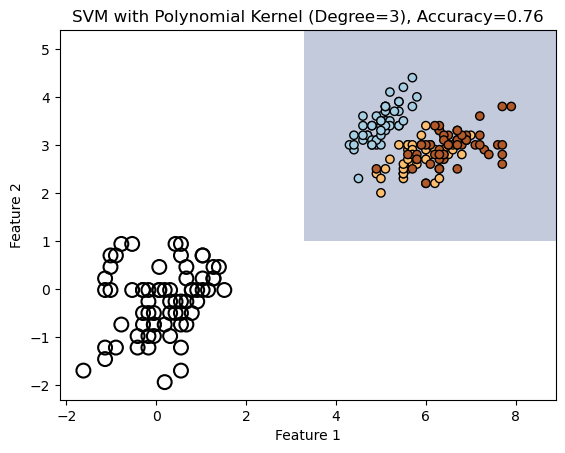

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset (for illustration purposes)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a polynomial kernel
degree = 3  # Polynomial degree
C = 1.0  # Regularization parameter
svm_classifier = SVC(kernel='poly', degree=degree, C=C)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and support vectors
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            facecolors='none', edgecolors='k', s=100, marker='o', linewidths=1.5)
plt.title(f"SVM with Polynomial Kernel (Degree={degree}), Accuracy={accuracy:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In this example:

We use the Iris dataset for illustration purposes, but you can replace it with your own dataset.
The features are standardized using StandardScaler to ensure that each feature has a mean of 0 and a standard deviation of 1.
We create an SVM classifier with a polynomial kernel using SVC with kernel='poly'.
The degree of the polynomial kernel is set using the degree parameter.
The regularization parameter C controls the trade-off between having a smooth decision boundary and classifying training points correctly.
The decision boundary and support vectors are plotted for visualization.
Adjust the dataset and parameters according to your specific use case.

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter you're referring to is likely the epsilon parameter, denoted as \( \varepsilon \) (epsilon). This parameter is part of the formulation of the SVR loss function and is used to define a tube around the predicted values within which no penalty is associated with errors. This tube is often referred to as the epsilon-insensitive tube.

The SVR loss function can be represented as:

\[ \max(0, |y - f(x)| - \varepsilon) \]

Here:
- \( y \) is the actual target value.
- \( f(x) \) is the predicted value.
- \( \varepsilon \) is the epsilon parameter.

The epsilon-insensitive tube allows for a certain level of error (\( \varepsilon \)) around the predicted values where no penalty is applied. If the error falls within this tube, it does not contribute to the loss.

### Effect of Increasing Epsilon on Support Vectors:

1. **Larger Epsilon (Wider Tube):**
   - When you increase the value of \( \varepsilon \), you are essentially widening the tube around the predicted values.
   - A wider tube means that more data points can fall within the tube without incurring a penalty.
   - As a result, fewer data points are treated as support vectors because they are allowed to have larger deviations from the predicted values.

2. **Smaller Epsilon (Narrower Tube):**
   - Conversely, decreasing the value of \( \varepsilon \) narrows the tube, making it more restrictive.
   - A narrower tube means that predictions must be closer to the actual values to avoid penalties, leading to more data points being treated as support vectors.

### Summary:

- **Wider Tube (Larger \( \varepsilon \)):**
  - Fewer support vectors.
  - More tolerance for errors; predictions can deviate more from the actual values without penalty.

- **Narrower Tube (Smaller \( \varepsilon \)):**
  - More support vectors.
  - Less tolerance for errors; predictions must be closer to the actual values to avoid penalties.

Choosing the appropriate value for \( \varepsilon \) depends on the specific characteristics of the data and the desired balance between fitting the training data closely and allowing for some degree of error. Cross-validation and grid search techniques can be employed to find an optimal value for \( \varepsilon \) based on the performance of the SVR model.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?

Support Vector Regression (SVR) has several hyperparameters that significantly impact its performance. Understanding the effects of these parameters is crucial for optimizing the SVR model. Let's discuss the main SVR parameters: kernel function, C parameter, epsilon parameter (\( \varepsilon \)), and gamma parameter.

### 1. Kernel Function:
- **Role:** The kernel function determines the type of function used to transform the input features into a higher-dimensional space. Common choices include linear, polynomial, and radial basis function (RBF or Gaussian).
- **Effect:**
  - Linear Kernel (\( K(x, x') = x \cdot x' \)): Suitable for linear relationships.
  - Polynomial Kernel (\( K(x, x') = (x \cdot x' + c)^d \)): Suitable for non-linear relationships with the degree \( d \) and constant \( c \).
  - RBF Kernel (\( K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right) \)): Suitable for capturing complex, non-linear relationships.

### 2. C Parameter:
- **Role:** The regularization parameter \( C \) trades off the flatness of the hyperplane against the amount of training error allowed. It controls the balance between fitting the training data closely and avoiding overfitting.
- **Effect:**
  - Larger \( C \): Smaller margin, fewer support vectors, may lead to overfitting.
  - Smaller \( C \): Larger margin, more support vectors, may lead to underfitting.

### 3. Epsilon Parameter (\( \varepsilon \)):
- **Role:** \( \varepsilon \) defines the epsilon-insensitive tube around the predicted values within which no penalty is associated with errors.
- **Effect:**
  - Larger \( \varepsilon \): Wider tube, more tolerance for errors, fewer support vectors.
  - Smaller \( \varepsilon \): Narrower tube, less tolerance for errors, more support vectors.

### 4. Gamma Parameter:
- **Role:** In RBF kernel, \( \gamma \) defines how far the influence of a single training example reaches.
- **Effect:**
  - Larger \( \gamma \): Smaller standard deviation, more localized influence, may lead to overfitting.
  - Smaller \( \gamma \): Larger standard deviation, more global influence, may lead to underfitting.

### Examples:

- **Linear Kernel:**
  - Increase \( C \) when you want a smaller margin and potentially overfitting.
  - Decrease \( C \) when you want a larger margin and more tolerance for errors.

- **Polynomial Kernel:**
  - Increase \( C \) for a more complex model with a smaller margin.
  - Adjust \( \varepsilon \) based on the acceptable error around predictions.

- **RBF Kernel:**
  - Optimize \( C \) and \( \gamma \) together; increasing both may lead to overfitting.
  - Tune \( \varepsilon \) based on the desired tolerance for errors.

It's important to note that the optimal values for these parameters depend on the specific characteristics of the data. Cross-validation and grid search techniques can be used to find the best combination of hyperparameters based on the performance of the SVR model on a validation set. Regularization and avoiding overfitting are crucial considerations when tuning these parameters.

Q5. Assignment:

Import the necessary libraries and load the dataset

Split the dataset into training and testing set

Preprocess the data using any technique of your choice (e.g. scaling, normalization)

Create an instance of the SVC classifier and train it on the training data

Use the trained classifier to predict the labels of the testing data

Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-score)

Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performance

Train the tuned classifier on the entire dataset

Save the trained classifier to a file for future use.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,n_classes=2,n_redundant=0)

In [3]:
X

array([[-1.63992998,  0.31687496],
       [-3.78205906, -0.25491663],
       [ 1.16534004,  0.84556029],
       ...,
       [-0.42273289,  3.12485393],
       [-1.68850466,  0.56121077],
       [-0.33156314,  1.41846995]])

In [4]:
y

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
X_train=scaler.fit_transform(X_train)

In [9]:
X_test=scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC

In [12]:
svc=SVC(kernel="linear")

In [13]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
svc.coef_

array([[1.87638883, 0.30645239]])

In [15]:
svc.intercept_

array([-0.1748288])

In [16]:
y_pred=svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [18]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       123
           1       0.82      0.83      0.83       127

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

[[100  23]
 [ 21 106]]
0.824


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
parameters={
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear']
            }

In [22]:
grid=GridSearchCV(SVC(),param_grid=parameters,cv=5,refit=True,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.867 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.873 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.867 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.873 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.827 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.880 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [25]:
y_pred=grid.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       123
           1       0.82      0.84      0.83       127

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[100  23]
 [ 20 107]]
0.828


In [27]:
import pickle

In [29]:
pickle.dump(grid,file=open("SVC pickle.pkl","wb"))